# **Benchmarking of State-of-the-Art Machine Learning Algorithms for Music Genre Classification** 
## Source Code PRML Project
### *André Torvestad, Frédérique Koopman, Siri Rüegg*

## 1. Data Exploration and Data Pre Processing

#### Retrieving Dataset

The dataset can be retrieved from Kaggle and is called *GTZAN Dataset - Music Genre Classification* ([Dataset Link](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification)). For the classifier and the Neural Network (NN) the *features_3_sec.csv* file was used. For the Convolutional Neural Network (CNN) the images_original were used.




#### General Exploration
- Assess shape of data
- Dropping unnecessary features
- Checking for missing data
- Get descriptive statistics

In [ ]:
# Import librabies
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dt = pd.read_csv('/content/drive/MyDrive/Project_PRML/features_3_sec.csv')
print(dt.shape)   # We have 9990 observations with 60 features. 
dt.head()

(9990, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
dt.drop('filename',inplace=True,axis=1) 

In [ ]:
dt.isna().sum() # Check if there is missing data for each feature

length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var                  0
mfcc9_mean    

In [ ]:
dt.describe() # Get the descriptive statistics

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


### Normalization of the data

Boxplot below shos that data is not normalised, therefore it will be normalised using the StandardScaler

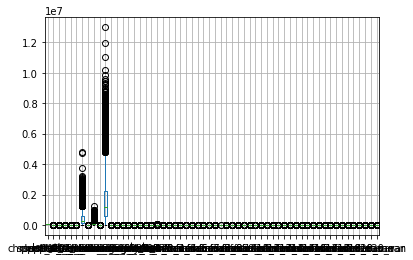

In [ ]:
dt.boxplot();

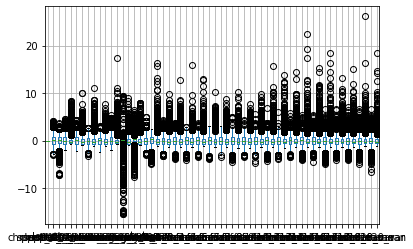

In [ ]:
from sklearn.preprocessing import StandardScaler

nrm = StandardScaler()  

nrm.fit(dt.iloc[:,:-1])

dt.iloc[:,:-1] = pd.DataFrame(nrm.transform(dt.iloc[:,:-1]),
                               columns = dt.iloc[:,:-1].columns[:],
                               index=dt.iloc[:,:-1].index)
dt.boxplot();

### t-SNE Projection

For visualizing the high-dimensional data by giving each datapoint a location in a two-dimensional map

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

Xp_tsne = pd.DataFrame(tsne.fit_transform(dt.iloc[:,:-1]))
Xp_tsne['label'] = dt.iloc[:,-1]
Xp_tsne.head()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,0,1,label
0,-28.396976,18.878525,blues
1,-28.836922,19.848385,blues
2,-28.830368,18.279837,blues
3,-28.769680,18.858456,blues
4,-28.647793,18.610254,blues


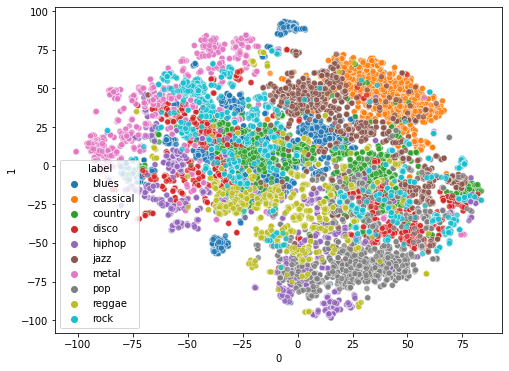

In [ ]:
plt.figure(figsize=(8,6)) 
sns.scatterplot(data=Xp_tsne, hue='label', x=0, y=1, alpha=0.75)
#plt.title('Songs - tSNE projection', size=22)
plt.show()

### PCA Analysis

In [ ]:
from sklearn import decomposition

dt_cleared = dt.drop(['length', 'label'], axis = 1)
pca = decomposition.PCA(n_components=57).fit(dt_cleared)

[ 20.05498557  33.59769718  43.94301714  50.53736518  54.8934821
  58.57064869  61.52441479  64.17821397  66.66691036  68.80907898
  70.66739088  72.40725041  74.11656465  75.60342221  76.97287773
  78.14671764  79.26039376  80.33627934  81.30903174  82.22254039
  83.08904559  83.93799371  84.78091896  85.58717312  86.36976358
  87.12899954  87.87984442  88.61212358  89.31133081  89.99205903
  90.66659231  91.31347478  91.94380491  92.55890054  93.16061398
  93.7395324   94.28457909  94.8091868   95.31278028  95.77326772
  96.22532264  96.67374291  97.10028956  97.51186762  97.9133814
  98.28394933  98.63411394  98.95219293  99.24746622  99.49643093
  99.67540178  99.80337931  99.89773879  99.9590971   99.98017833
  99.99390015 100.        ]
The number of principal components with which 95% of the variance is explained is:  38


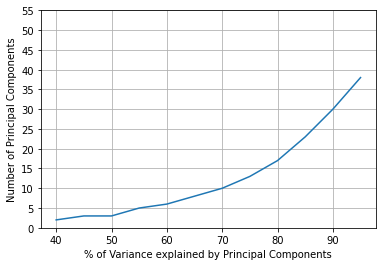

In [ ]:
pca_sums = 100*pca.explained_variance_ratio_.cumsum()
print(pca_sums)
pca_components = []
for i in range(40,100,5):
  idx = np.where(pca_sums < i)
  pca_components.append(idx[0][-1]+1)

x_percentage = np.arange(40,100,5)
plt.plot(x_percentage, pca_components)
plt.yticks(np.arange(0,60,5))
plt.grid(True)
plt.xlabel('% of Variance explained by Principal Components')
plt.ylabel('Number of Principal Components')
print("The number of principal components with which 95% of the variance is explained is: ", idx[0][-1]+1)

#### Preparing the data 

A standard 0.7 train-test-split size was chosen to split the data

In [ ]:
# Prepare the data

X = dt.drop(['length', 'label'], axis = 1)
y = dt.label

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7)



## 2. Classifiers 

In this section various supervised machine learning algorithms are used on the dataset and they will be evaluated by determining the accuracy and the precision. The objective of this project delivery is to predict in which country or continent a song will be trend in order to help the artist to decide to which regions he should release his song and where he should plan his concert tour to. 

The following machine learning algorithms are explored:

* KNN
* LDA
* QDA
* Adaboost
* Multilayer Perceptron
* Decision Tree
* Support Vector Machine

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time

temp = 0
accs = []
n_neighbours = []

# determine how many neighbours results in the highest accuracy
for i in range(1,21):
  model = KNeighborsClassifier(n_neighbors=i)

  model.fit(Xtrain, ytrain)
  ytest_pred = model.predict(Xtest)

  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import f1_score

  cm = confusion_matrix(ytest, ytest_pred)
  acc = accuracy_score(ytest, ytest_pred)
  accs.append(acc)

  n_neighbours.append(i)

  if (acc > temp):
    idx = i
    temp = acc

print("Highest Accuracy for KNN with", idx, "neighbours")
print()

# Various Machine Learning Algorithms

knn = KNeighborsClassifier(n_neighbors=idx)
rfc = RandomForestClassifier()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
adaboost = AdaBoostClassifier(random_state=0)
mlp = MLPClassifier()
dtc = DecisionTreeClassifier()
svm = SVC()

clfs = [knn,
        rfc,
        lda,
        qda,
        adaboost,
        mlp,
        dtc, 
        svm]

clfs_name = ['kNN',
             'RFC',
             'LDA',
             'QDA',
             'AdaBoost',
             'MLP',
             'DT',
             'SVM']

predictions = []
accuracies = []
f1scores = []
    
for index, clf in enumerate(clfs): 
    start_time = time.time()
    clf.fit(Xtrain,ytrain)
    pred = clf.predict(Xtest)
    predictions.append(pred)

    scr = f1_score(ytest,pred, average='weighted')
    f1scores.append(scr)

    acc = accuracy_score(ytest, pred)
    accuracies.append(acc)
    print('Accuracy of {} = {}, F1-Score = {}, Time used = {}'.format(clfs_name[index],acc,scr, time.time()-start_time))


#cm = confusion_matrix(ytest, ytest_pred)

#print('Confusion matrix:')
#print(cm)
#print()

#print('Accuracy = {}'.format(acc))

Highest Accuracy for KNN with 1 neighbours

Accuracy of kNN = 0.9005672339005673, F1-Score = 0.9003165802561167, Time used = 0.3850085735321045
Accuracy of RFC = 0.8541875208541875, F1-Score = 0.8530716260925738, Time used = 4.96821665763855
Accuracy of LDA = 0.6670003336670003, F1-Score = 0.6656409710974175, Time used = 0.17015576362609863
Accuracy of QDA = 0.7610944277610945, F1-Score = 0.76069247288902, Time used = 0.42836880683898926
Accuracy of AdaBoost = 0.46279612946279614, F1-Score = 0.4381795734795744, Time used = 4.150812387466431


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy of MLP = 0.8635301968635302, F1-Score = 0.8631228310080055, Time used = 14.53804326057434
Accuracy of DT = 0.6262929596262929, F1-Score = 0.6245670949862963, Time used = 0.7215476036071777
Accuracy of SVM = 0.8498498498498499, F1-Score = 0.8490149383297264, Time used = 4.622762680053711


Text(0, 0.5, 'Accuracy')

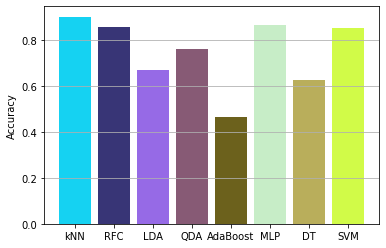

In [ ]:
plt.bar(clfs_name, accuracies, color=np.random.rand(len(clfs_name),3));
plt.grid(True, axis='y')
plt.ylabel('Accuracy')
#plt.yticks(np.arange(0.8, 1.0, 0.05))

### Evaluate best number of neighbours for kNN

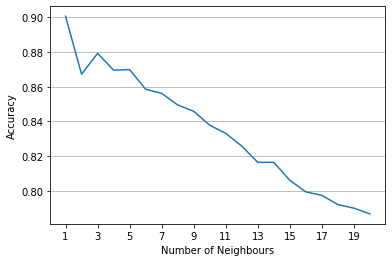

In [ ]:
plt.plot(n_neighbours, accs)
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.xticks(np.arange(min(n_neighbours), max(n_neighbours)+1, 2))
plt.grid(True, axis='y')
plt.show()

### Tuning of the MLP Hyperparameters

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, n_iter=100)
clf.fit(Xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


RandomizedSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']})

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.0001, 'activation': 'tanh'}
0.686 (+/-0.023) for {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'tanh'}
0.818 (+/-0.019) for {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'tanh'}
0.686 (+/-0.025) for {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'tanh'}
0.816 (+/-0.005) for {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'tanh'}
0.704 (+/-0.021) for {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.0001, 'activation': 'tanh'}
0.827 (+/-0.011) for {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.0001, 'activation

In [ ]:
y_true, y_pred = ytest , clf.predict(Xtest)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

       blues       0.86      0.87      0.87       321
   classical       0.91      0.90      0.91       283
     country       0.80      0.80      0.80       292
       disco       0.84      0.83      0.83       310
      hiphop       0.87      0.86      0.87       273
        jazz       0.80      0.85      0.83       301
       metal       0.93      0.89      0.91       290
         pop       0.88      0.88      0.88       301
      reggae       0.84      0.84      0.84       320
        rock       0.79      0.80      0.79       306

    accuracy                           0.85      2997
   macro avg       0.85      0.85      0.85      2997
weighted avg       0.85      0.85      0.85      2997



### Tuning of the KNN Hyperparameters

In [ ]:
from sklearn.metrics import classification_report

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = RandomizedSearchCV(knn_2, hyperparameters, cv=10, n_iter=100)
#Fit the model
best_model = clf.fit(Xtrain, ytrain)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

y_pred = clf.predict(Xtest)
print(classification_report(ytest, y_pred))

Best leaf_size: 42
Best p: 1
Best n_neighbors: 1
              precision    recall  f1-score   support

       blues       0.95      0.95      0.95       321
   classical       0.92      0.96      0.94       283
     country       0.88      0.85      0.87       292
       disco       0.88      0.95      0.91       310
      hiphop       0.96      0.92      0.94       273
        jazz       0.93      0.90      0.92       301
       metal       0.97      0.95      0.96       290
         pop       0.96      0.94      0.95       301
      reggae       0.90      0.96      0.93       320
        rock       0.91      0.86      0.89       306

    accuracy                           0.92      2997
   macro avg       0.93      0.92      0.92      2997
weighted avg       0.93      0.92      0.92      2997



### Calculating k-best features

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif

feature_lists = []
datapoints = np.arange(5,60,5)

for idx, data in enumerate(datapoints):
  ft = SelectKBest(f_classif, k=data).fit(Xtrain, ytrain)
  #print('Score: ', ft.scores_)
  #print('Columns: ', Xtrain.columns)
  ind = np.argpartition(ft.scores_, -data)[-data:]

  features = []
  
  for j in ind:
    features.append(Xtrain.columns[j])

  features_ = np.array(features)
  feature_lists.append(features)


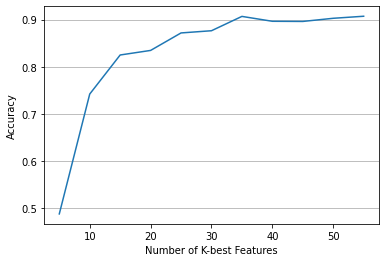

In [ ]:
accuracies2 = []

for i in range(len(feature_lists)):
  X = dt[feature_lists[i]]
  y = dt.label
  Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X, y, train_size=0.7)

  knn.fit(Xtrain2, ytrain2)
  y_pred = knn.predict(Xtest2)
  
  acc = accuracy_score(ytest2, y_pred)
  accuracies2.append(acc)

plt.plot(datapoints, accuracies2);
plt.xlabel('Number of K-best Features')
plt.ylabel('Accuracy')
plt.grid(True, axis='y')

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = RandomizedSearchCV(knn_2, hyperparameters, cv=10, n_iter=30)
#Fit the model
best_model = clf.fit(Xtrain2, ytrain2)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

y_pred = clf.predict(Xtest2)
print(classification_report(ytest2, y_pred))

Best leaf_size: 36
Best p: 1
Best n_neighbors: 3
              precision    recall  f1-score   support

       blues       0.92      0.90      0.91       310
   classical       0.93      0.97      0.95       315
     country       0.84      0.86      0.85       303
       disco       0.86      0.92      0.89       297
      hiphop       0.95      0.91      0.93       287
        jazz       0.92      0.91      0.91       298
       metal       0.97      0.96      0.97       299
         pop       0.97      0.89      0.92       284
      reggae       0.87      0.93      0.90       304
        rock       0.90      0.85      0.87       300

    accuracy                           0.91      2997
   macro avg       0.91      0.91      0.91      2997
weighted avg       0.91      0.91      0.91      2997



## 3. Neural Network (NN)

In [ ]:
# NN libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from numpy import argmax
import matplotlib.pyplot as plt

In [ ]:
# Replace class name with number for NN
id = dt['label'].unique()
d = {p[1]:p[0] for p in enumerate(id)}
d

NN_xtrain = Xtrain
NN_xtest = Xtest
NN_ytrain = ytrain.replace(d)
NN_ytest = ytest.replace(d)

### 3.1 Simple NN
Okay performance, but underfits. 

In [ ]:
%%time
n_inputs = 57 # Number of features
n_outputs = 10 # Number of labels

model = Sequential()
model.add(Dense(n_inputs, input_dim=n_inputs, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

epochs=11
batch_size=16

history = model.fit(NN_xtrain, NN_ytrain, epochs=epochs, batch_size=batch_size, validation_split=0.2)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (20, 8))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title(f'Epoch = {epochs}', size=20)
ax1.set_ylabel('Loss', size=16)
ax1.set_xticks(range(0, epochs+1, round(epochs/5)))
ax1.legend(['Train', 'Validation'], loc='upper right')

x,y =model.evaluate(NN_xtest, NN_ytest)
print(f"Evaluation yields loss value: {round(x,2)} and accuracy: {round(y,2)}")

### 3.2 3 hidden layers


In [ ]:
%%time
n_inputs = 57 # Number of features
n_outputs = 10 # Number of labels

model = Sequential()
model.add(Dense(n_inputs, input_dim=n_inputs, activation='relu'))
model.add(Dense(2*n_inputs, input_dim=n_inputs, activation='relu'))
model.add(Dense(n_inputs, input_dim=n_inputs, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

epochs=11
batch_size=16

history_overfit = model.fit(NN_xtrain, NN_ytrain, epochs=epochs, batch_size=batch_size, validation_split=0.2)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (20, 8))

ax1.plot(history_overfit.history['loss'])
ax1.plot(history_overfit.history['val_loss'])
ax1.set_title(f'Epoch = {epochs}', size=20)
ax1.set_ylabel('Loss', size=16)
ax1.set_xticks(range(0, epochs+1, round(epochs/5)))
ax1.legend(['Train', 'Validation'], loc='upper right')

x,y =model.evaluate(NN_xtest, NN_ytest)
print(f"Evaluation yields loss value: {round(x,2)} and accuracy: {round(y,2)}")

### 3.3 Introduce dropout

In [ ]:
%%time
n_inputs = 57 # Number of features
n_outputs = 10 # Number of labels

model = Sequential()
model.add(Dense(n_inputs, input_dim=n_inputs, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2*n_inputs, input_dim=n_inputs, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_inputs, input_dim=n_inputs, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

epochs=50
batch_size=16

history = model.fit(NN_xtrain, NN_ytrain, epochs=epochs, batch_size=batch_size, validation_split=0.2)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (20, 8))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title(f'Epoch = {epochs}', size=20)
ax1.set_ylabel('Loss', size=16)
ax1.set_xticks(range(0, epochs+1, round(epochs/5)))
ax1.legend(['Train', 'Validation'], loc='upper right')

x,y =model.evaluate(NN_xtest, NN_ytest)
print(f"Evaluation yields loss value: {round(x,2)} and accuracy: {round(y,2)}")

### 3.4 Best result

In [ ]:
%%time
n_inputs = 57 # Number of features
n_outputs = 10 # Number of labels

model = Sequential()
model.add(Dense(2*n_inputs, input_dim=n_inputs, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3*n_inputs, input_dim=n_inputs, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

epochs=32
batch_size=16

history = model.fit(NN_xtrain, NN_ytrain, epochs=epochs, batch_size=batch_size, validation_split=0.2)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (20, 8))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title(f'Epoch = {epochs}', size=20)
ax1.set_ylabel('Loss', size=16)
ax1.set_xticks(range(0, epochs+1, round(epochs/5)))
ax1.legend(['Train', 'Validation'], loc='upper right')

x,y =model.evaluate(NN_xtest, NN_ytest)
print(f"Evaluation yields loss value: {round(x,2)} and accuracy: {round(y,2)}")

## 4.1 Complex CNN

In [ ]:
# Import librabies
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error
from numpy import argmax

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

**WARNING!!**

Only run the "shutil.rmtree" code line (decomment) when running the script for the second time, so that the created folders will be removed.

In [ ]:
# To run it again, remove the output directory
import shutil
#shutil.rmtree('/content/output')

In [ ]:
pip install split-folders

In [ ]:
import splitfolders

**Splitting in training and test data**

Since flow_from_directory is the easiest way to work with the image data for the CNN, the data will be copied to new folders and the data is automatically splitted in training and testing data (70% training and 30% testing).

In [ ]:
data = 'drive/MyDrive/Project_PRML/Data/images_original'
splitfolders.ratio(data, output="output", seed=1337, ratio=(.7,.3)) 

**Image augmentation**

In [ ]:
src_path_train = "output/train/"
src_path_test = "output/val/"

train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest"
        )

test_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
batch_size = 64
train_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    directory=src_path_test,
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

**Build the complex CNN**

The complex CNN is built here. 
Multiple convolutional layers and MaxPooling layers are used. Also, three dense layers with a decreasing number of neurons is used.

In [ ]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[256, 256, 3]))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model


In [ ]:
CNN = prepare_model()
CNN.summary()

**Fit the model to the Data**

In [ ]:
history = CNN.fit(x=train_generator,validation_data=test_generator, epochs=30)

In [ ]:
epochs=30
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20, 8))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss', size=20)
ax1.set_ylabel('Loss', size=16)
ax1.set_xlabel('Epoch', size=16)
ax1.set_xticks(range(0, epochs, 1))
ax1.legend(['Train', 'Validation'], loc='upper right')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Classification accuracy', size=20)
ax2.set_ylabel('Accuracy', size=16)
ax2.set_xlabel('Epoch', size=16)
ax2.set_xticks(range(0, epochs, 1))
ax2.legend(['Train', 'Validation'], loc='upper left')

fig.suptitle('Learning curves', size=20)

plt.show()

# 4.2 Simple CNN

**WARNING!!**

Only run the "shutil.rmtree" code lines (decomment) when running the script for the second time, so that the created folders will be removed.

In [ ]:
# To run it again, remove the output directory
import shutil
shutil.rmtree('/content/output')
#shutil.rmtree('/content/drive/MyDrive/Project_PRML/Data/Three_genres')

**Picking three genres**

To see if the CNN works better for three genres instead of all 10 genres, the code below is developed to visualize a random image of each sample. The three most different genres are picked for further training of the CNN.

In [ ]:
paths = []
base_path = r"/content/drive/MyDrive/Project_PRML/Data/images_original/"
genres = os.listdir(r"/content/drive/MyDrive/Project_PRML/Data/images_original/")
for genre in range(len(genres)):
  paths.append(os.path.join(base_path+genres[genre]))

In [ ]:
random_images = []
for genre in paths:
  random_file = random.choice([x for x in os.listdir(genre) if os.path.isfile(os.path.join(genre,x))])
  random_images.append(random_file)


In [ ]:
paths_random_images = []
for img in range(len(random_images)):
  paths_random_images.append(os.path.join(paths[img],random_images[img]))

In [ ]:
from matplotlib import pyplot as plt
list_images = []
for img in range(len(paths_random_images)):
  im = plt.imread(paths_random_images[img])
  list_images.append(im)

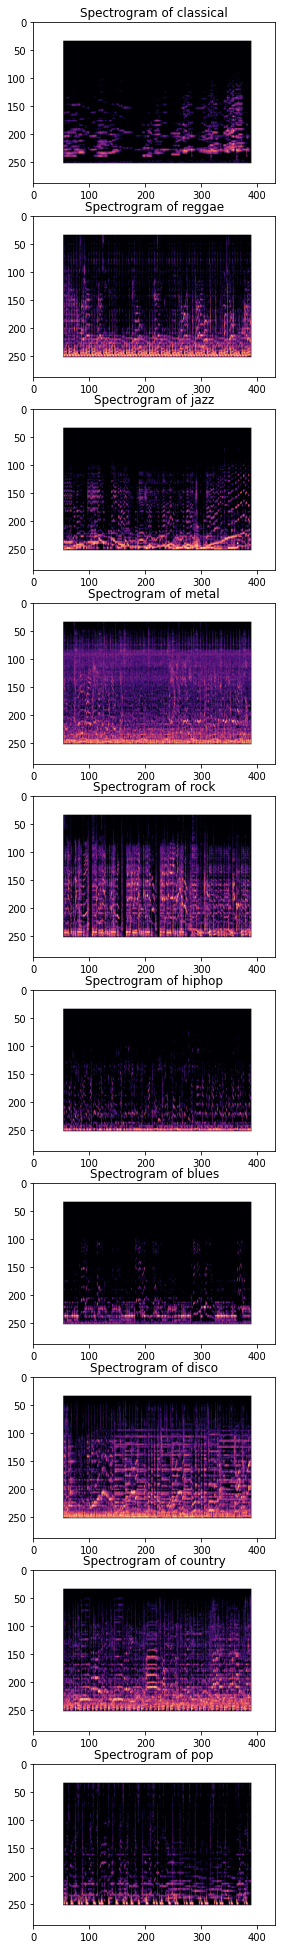

In [ ]:
# Plot one randomly picked image of each genre
f, axarr = plt.subplots(10,1)
f.set_figheight(35)
f.set_figwidth(35)

for img in range(len(list_images)):
  axarr[img].imshow(list_images[img])
  axarr[img].set_title(f'Spectrogram of {genres[img]}')

plt.show()

In this plot, one Mel spectrogram for each genre is visualized. 
Three genres are manually chosen that are visually most different based on their spectrogram.
The chosen genres are:
*   Hiphop
*   Metal
*   Classical




In [ ]:
data_hiphop = 'drive/MyDrive/Project_PRML/Data/images_original/hiphop/'
data_metal = 'drive/MyDrive/Project_PRML/Data/images_original/metal/'
data_classical = 'drive/MyDrive/Project_PRML/Data/images_original/classical/'
three_genres = [data_hiphop,data_metal,data_classical]

**Splitting in training and test data**

Since flow_from_directory is the easiest way to work with the image data for the CNN, the data will be copied to new folders and the data is automatically splitted in training and testing data (70% training and 30% testing).

In [ ]:
# Destination paths
dest_hiphop = '/content/drive/MyDrive/Project_PRML/Data/Three_genres/hiphop'
dest_metal = '/content/drive/MyDrive/Project_PRML/Data/Three_genres/metal'
dest_classical = '/content/drive/MyDrive/Project_PRML/Data/Three_genres/classical'

shutil.copytree(data_hiphop, dest_hiphop) 
shutil.copytree(data_metal, dest_metal) 
shutil.copytree(data_classical, dest_classical) 

'/content/drive/MyDrive/Project_PRML/Data/Three_genres/classical'

In [ ]:
# Split the three genres in training and validation subsets
splitfolders.ratio("/content/drive/MyDrive/Project_PRML/Data/Three_genres", output="output", seed=1337, ratio=(.7,.3)) 

Copying files: 300 files [00:01, 285.49 files/s]


In [ ]:
src_path_train = "output/train/"
src_path_test = "output/val/"

train_datagen = ImageDataGenerator(rescale=1 / 255.0)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
batch_size = 16
train_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    directory=src_path_test,
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 210 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


**Building the CNN**

Now, the simple CNN is built. One convolutional layer is used with 32 filters, followed by a MaxPooling layer with a size of 2.
After the Flatten layer, one Dense layer with 128 neurons is added, followed by a Dropout layer. The final Dense layer contains 3 neurons, as we have 3 classes.

In [ ]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[256, 256, 3]))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model


In [ ]:
CNN = prepare_model()
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 64)                33032256  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                        

**Fit model to data**

In [ ]:
history = CNN.fit(x=train_generator,validation_data=test_generator, epochs=15)

Epoch 1/15
14/14 [==============================] - 13s 112ms/step - loss: 16.3545 - accuracy: 0.3905 - val_loss: 1.0950 - val_accuracy: 0.5889
Epoch 2/15
14/14 [==============================] - 1s 94ms/step - loss: 0.7280 - accuracy: 0.7762 - val_loss: 0.4928 - val_accuracy: 0.8222
Epoch 3/15
14/14 [==============================] - 1s 98ms/step - loss: 0.3497 - accuracy: 0.9143 - val_loss: 0.3083 - val_accuracy: 0.9000
Epoch 4/15
14/14 [==============================] - 1s 93ms/step - loss: 0.1879 - accuracy: 0.9381 - val_loss: 0.2927 - val_accuracy: 0.8889
Epoch 5/15
14/14 [==============================] - 1s 107ms/step - loss: 0.0911 - accuracy: 0.9714 - val_loss: 0.2732 - val_accuracy: 0.9000
Epoch 6/15
14/14 [==============================] - 1s 103ms/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 0.2652 - val_accuracy: 0.9333
Epoch 7/15
14/14 [==============================] - 1s 96ms/step - loss: 0.0441 - accuracy: 0.9810 - val_loss: 0.2465 - val_accuracy: 0.9222
Epoch 8/

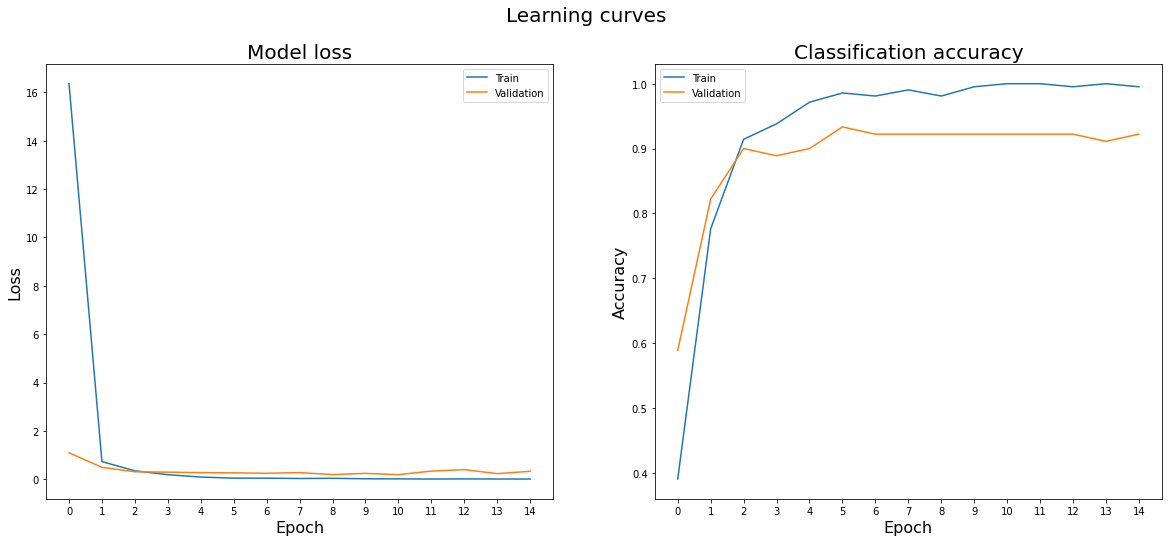

In [ ]:
epochs=15
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20, 8))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss', size=20)
ax1.set_ylabel('Loss', size=16)
ax1.set_xlabel('Epoch', size=16)
ax1.set_xticks(range(0, epochs, 1))
ax1.legend(['Train', 'Validation'], loc='upper right')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Classification accuracy', size=20)
ax2.set_ylabel('Accuracy', size=16)
ax2.set_xlabel('Epoch', size=16)
ax2.set_xticks(range(0, epochs, 1))
ax2.legend(['Train', 'Validation'], loc='upper left')

fig.suptitle('Learning curves', size=20)

plt.show()